# 📊 Analyse Exploratoire Avancée (Advanced EDA)
## Projet: Morocco Student Data Analysis

Ce notebook présente une analyse approfondie du jeu de données nettoyé `Morocco_Student_Data_Cleaned.csv`.
L'objectif est de comprendre les distributions, les relations entre les variables et d'identifier les facteurs influençant la réussite scolaire.

### 📝 Plan de l'analyse :
1. **Chargement et Aperçu** : Comprendre la structure des données.
2. **Nettoyage et Vérification** : S'assurer que les données sont prêtes (valeurs manquantes, types).
3. **Analyse Univariée** : Distribution des variables numériques et catégorielles.
4. **Détection des Outliers** : Identification des valeurs aberrantes via Boxplots.
5. **Analyse Bivariée & Multivariée** : Corrélations et relations avec la variable cible (`niveau_risque` / `moyenne_annuelle`).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Bibliothèques importées.")


✅ Bibliothèques importées.


In [10]:
# Chargement du fichier
file_name = 'Morocco_Student_Data_Cleaned.csv'

try:
    df = pd.read_csv(file_name)
    print(f"✅ Données chargées : {df.shape[0]} lignes, {df.shape[1]} colonnes.")
except FileNotFoundError:
    print("❌ Erreur : Fichier introuvable. Veuillez vérifier le nom du fichier.")


✅ Données chargées : 10000 lignes, 268 colonnes.


In [11]:
# Aperçu des 5 premières lignes
display(df.head())

# Informations sur les types de données
print("\n--- Info ---")
df.info()

# Vérification des valeurs manquantes
missing = df.isnull().sum()
print("\n--- Valeurs Manquantes (Top 10) ---")
print(missing[missing > 0].sort_values(ascending=False).head(10))


,id_etudiant,prenom,nom,nom_complet,sexe,date_naissance,age,code_massar,region,province,...,autre_langue,locuteur_amazigh,maitrise_darija,francais_maison,performance_cible,niveau_risque,intervention_necessaire,date_collecte,id_collecteur,statut_verification
0,STU00001,Soumia,Chraibi,Soumia Chraibi,F,2007-05-05,19,G548679848,Fes-Meknes,El Hajeb,...,Non,Natif,Rarement,Tres Eleve,0.54,Moyen,Oui,2026-01-15,COL008,Verifie
1,STU00002,Mehdi,Tazi,Mehdi Tazi,M,2009-10-12,17,G478451439,Souss-Massa,Inezgane,...,Oui,Natif,Parfois,Eleve,0.08,Eleve,Oui,2026-01-15,COL005,Verifie
2,STU00003,Bilal,Lahbabi,Bilal Lahbabi,M,2008-08-08,18,G727518594,Casablanca-Settat,Berrechid,...,Oui,Natif,Souvent,Tres Eleve,0.47,Eleve,Oui,2026-01-15,COL001,Verifie
3,STU00004,Hakim,Chraibi,Hakim Chraibi,M,2009-10-05,17,G868905524,Tanger-Tetouan-Al Hoceima,Larache,...,Non,Natif,Parfois,Eleve,0.55,Moyen,Oui,2026-01-15,COL008,Verifie
4,STU00005,Ayoub,Lahbabi,Ayoub Lahbabi,M,2007-05-27,19,G809425460,Casablanca-Settat,El Jadida,...,Non,Natif,Souvent,Eleve,0.15,Eleve,Oui,2026-01-15,COL004,Verifie



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 268 entries, id_etudiant to statut_verification
dtypes: float64(53), int64(43), object(172)
memory usage: 20.4+ MB

--- Valeurs Manquantes (Top 10) ---
Series([], dtype: int64)


## 🎯 1. Analyse de la Variable Cible


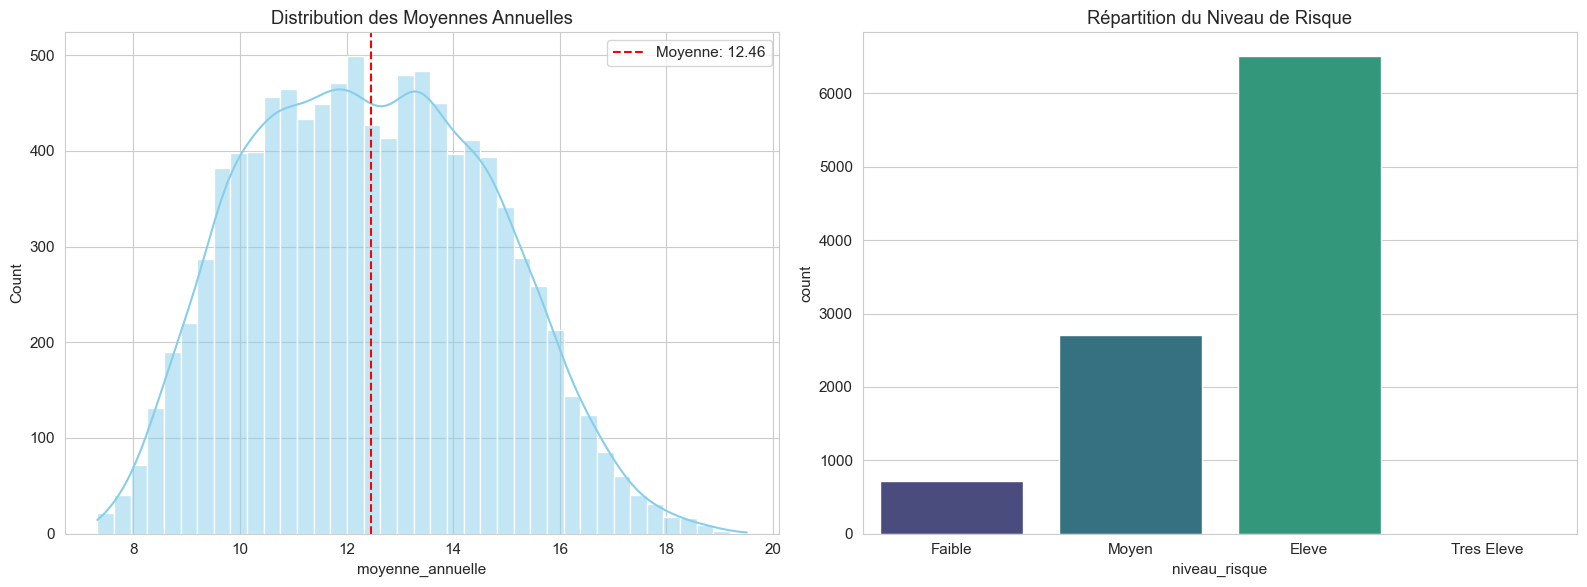

In [12]:
# Définition de la cible
target_cat = 'niveau_risque'  # Cible catégorielle (Faible, Moyen, Élevé)
target_num = 'moyenne_annuelle' # Cible numérique (Note /20)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Distribution de la moyenne annuelle
sns.histplot(df[target_num], kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(df[target_num].mean(), color='red', linestyle='--', label=f'Moyenne: {df[target_num].mean():.2f}')
axes[0].set_title('Distribution des Moyennes Annuelles')
axes[0].legend()

# 2. Distribution du niveau de risque
if target_cat in df.columns:
    sns.countplot(x=target_cat, data=df, ax=axes[1], palette='viridis', order=['Faible', 'Moyen', 'Eleve', 'Tres Eleve'])
    axes[1].set_title('Répartition du Niveau de Risque')
else:
    axes[1].text(0.5, 0.5, 'Variable niveau_risque non trouvée', ha='center')

plt.tight_layout()
plt.show()


## 📊 2. Analyse des Variables Numériques & Outliers


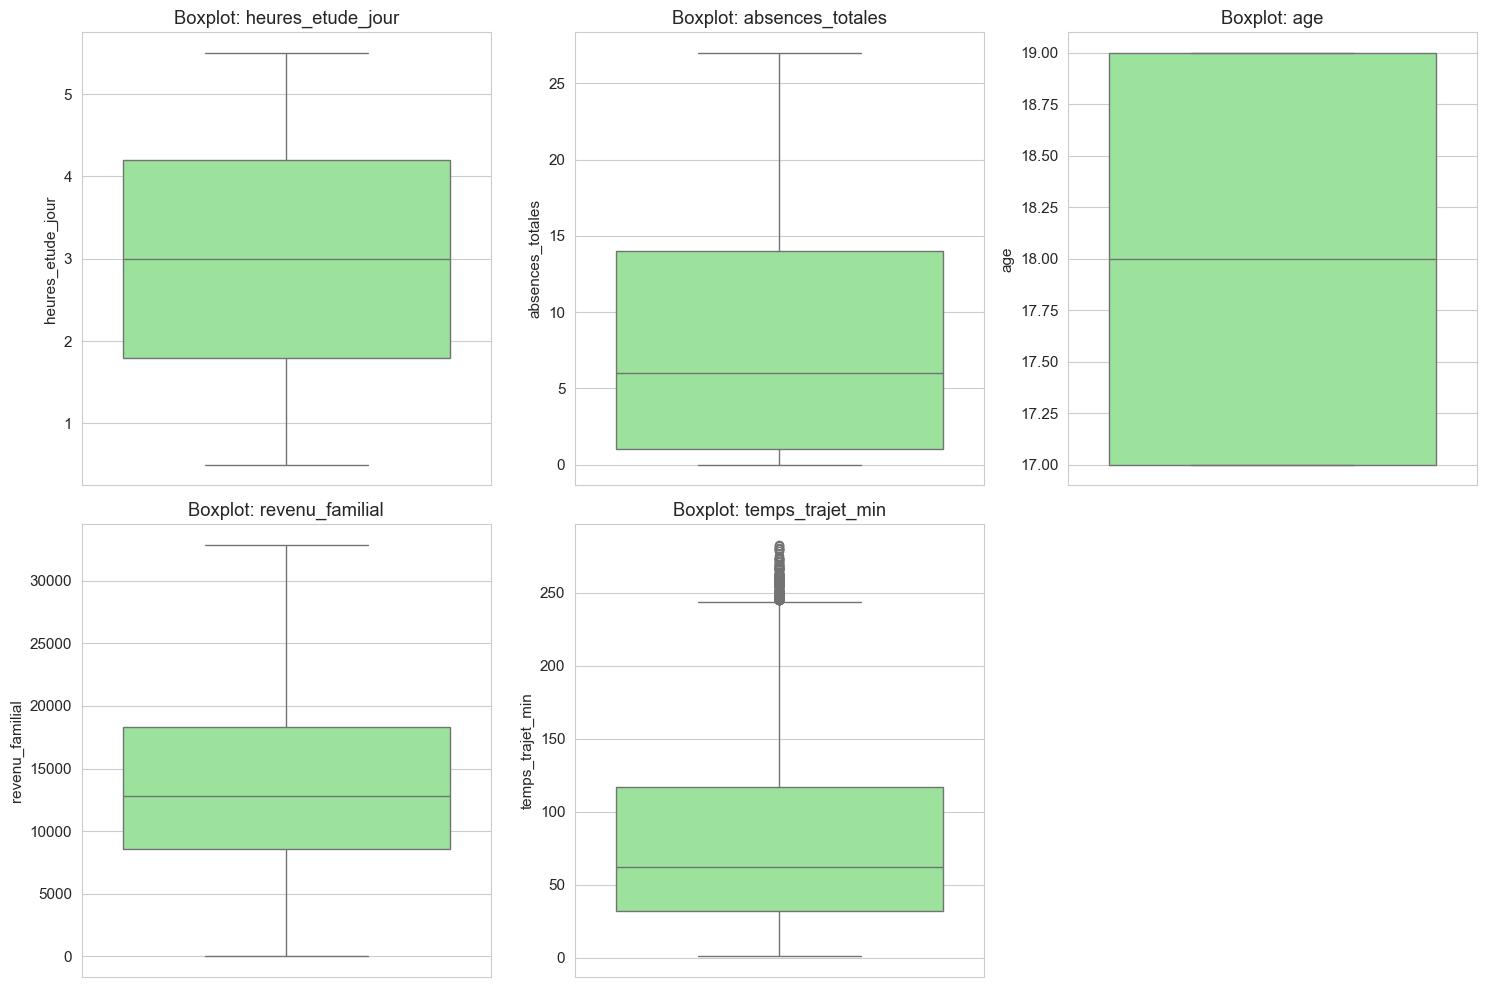

In [13]:
# Sélection des variables numériques clés
num_cols = ['heures_etude_jour', 'absences_totales', 'age', 'revenu_familial', 'temps_trajet_min']
num_cols = [c for c in num_cols if c in df.columns]

# Création de Boxplots pour voir les Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.show()


## 🏢 3. Analyse des Variables Catégorielles


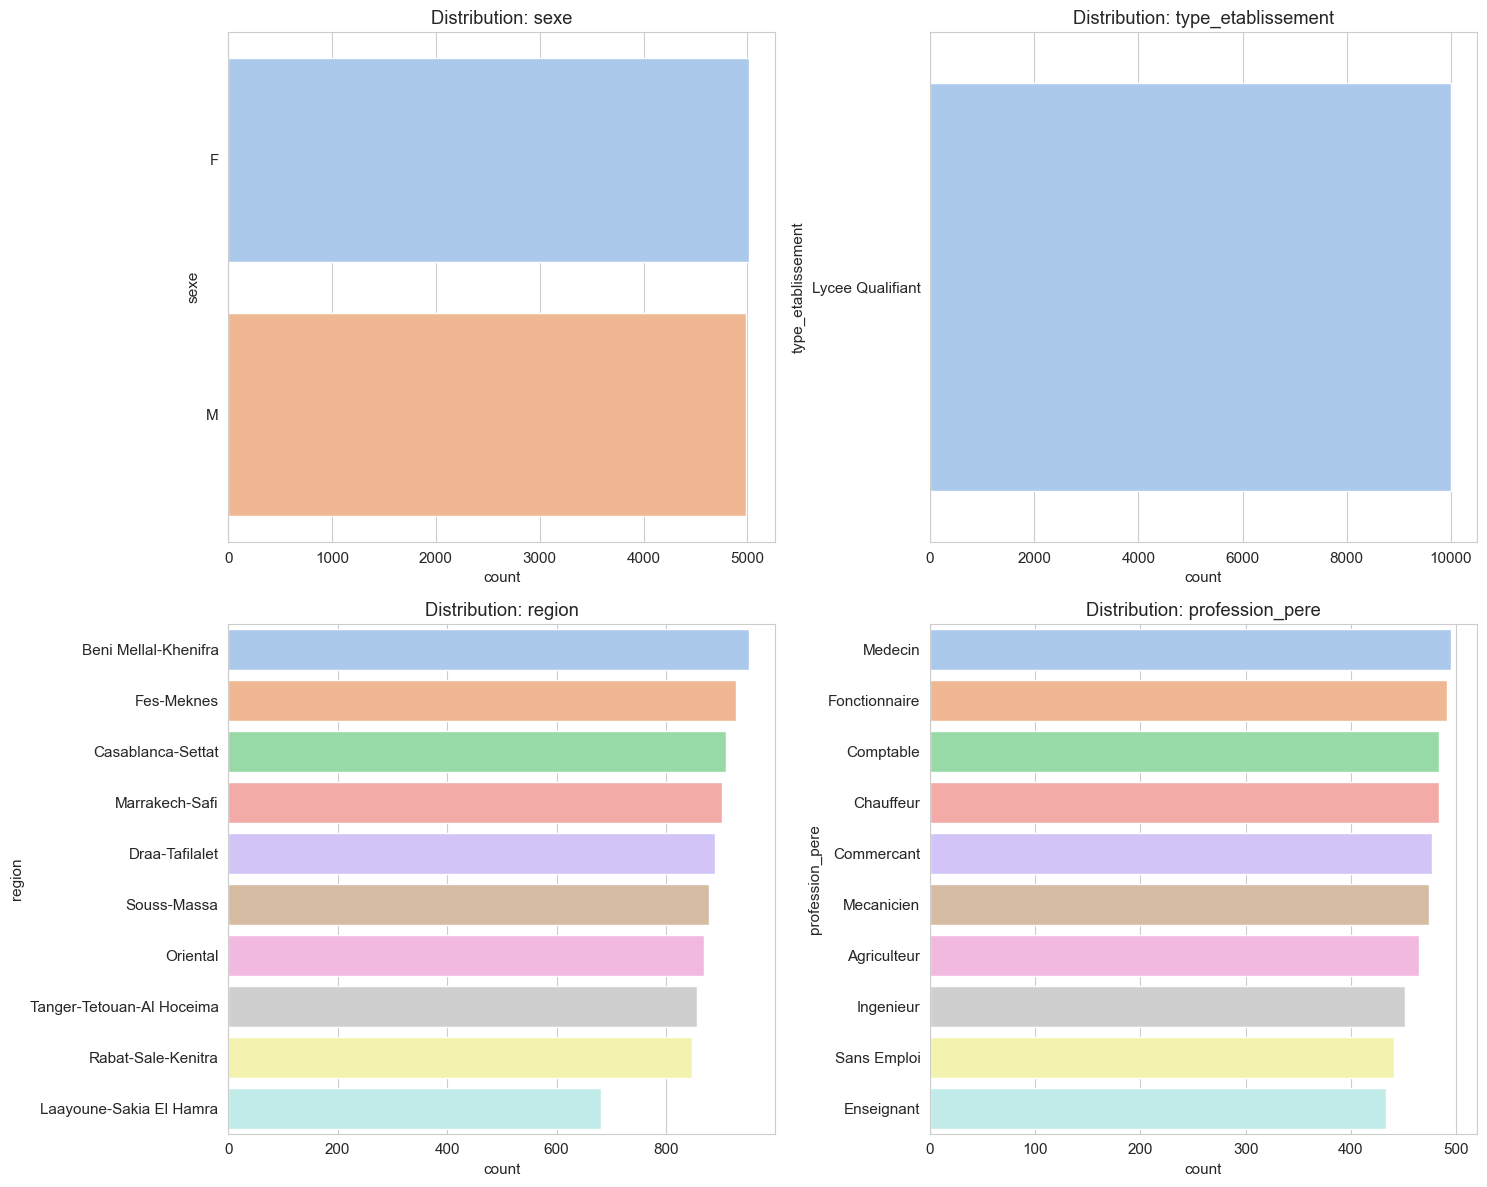

In [14]:
cat_cols = ['sexe', 'type_etablissement', 'region', 'profession_pere']
cat_cols = [c for c in cat_cols if c in df.columns]

plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    # Pour les catégories avec beaucoup de valeurs, on prend le Top 10
    top_cats = df[col].value_counts().index[:10]
    sns.countplot(y=col, data=df[df[col].isin(top_cats)], order=top_cats, palette='pastel')
    plt.title(f'Distribution: {col}')
    plt.tight_layout()

plt.show()


## 🔥 4. Matrice de Corrélation


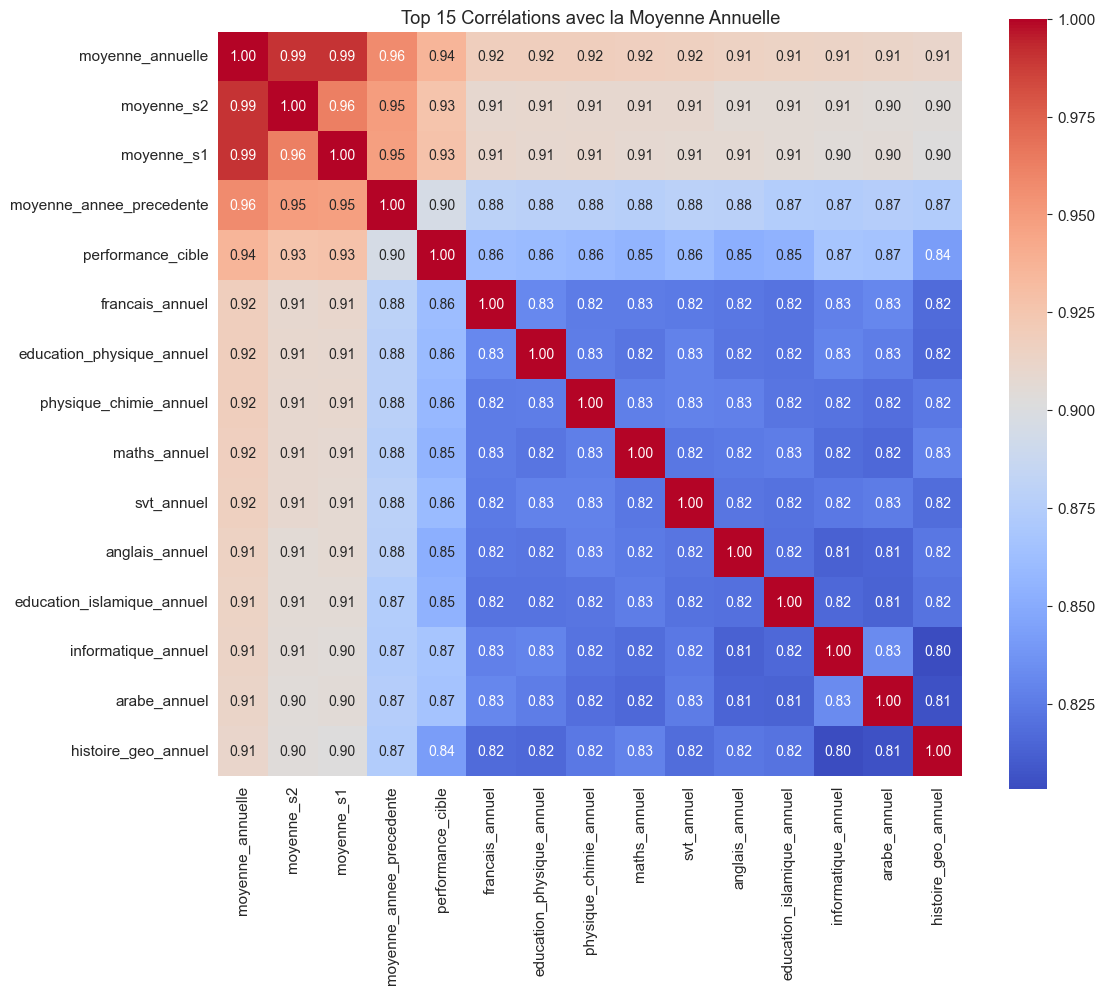

In [15]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=[np.number])

# Calcul de la corrélation
corr_matrix = numeric_df.corr()

# Filtrer pour afficher les corrélations les plus fortes avec la Moyenne Annuelle
k = 15 # Nombre de variables à afficher
cols = corr_matrix.nlargest(k, 'moyenne_annuelle')['moyenne_annuelle'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values, cmap='coolwarm')
plt.title('Top 15 Corrélations avec la Moyenne Annuelle')
plt.show()


## 🔗 5. Facteurs d'Influence (Bivariée)


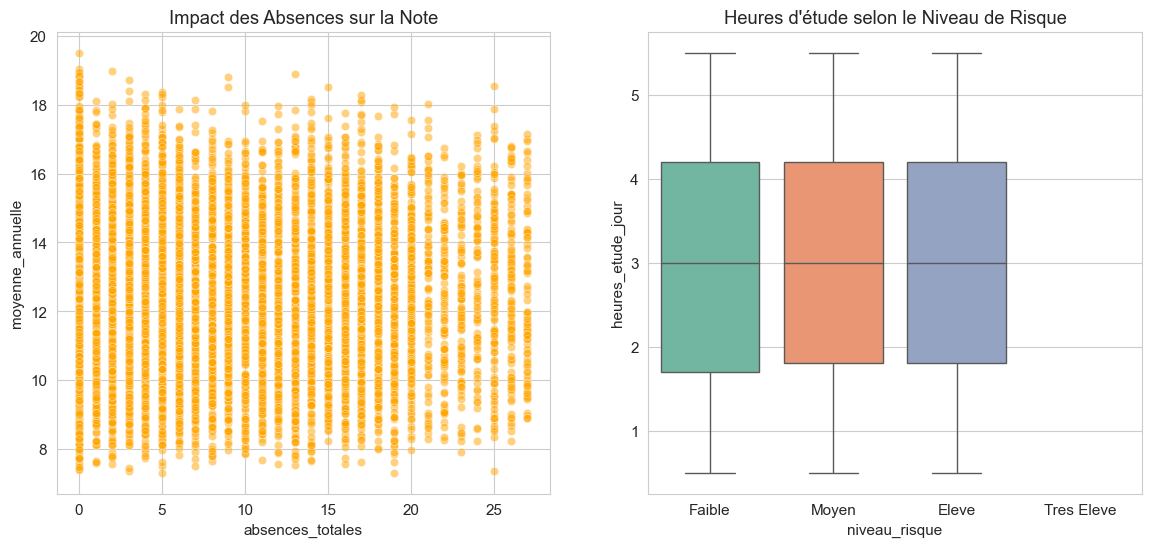

In [16]:
# Relation entre 'Absences' et 'Moyenne'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='absences_totales', y='moyenne_annuelle', data=df, alpha=0.5, color='orange')
plt.title('Impact des Absences sur la Note')

# Relation entre 'Heures d\'étude' et 'Moyenne', coloré par 'Niveau de Risque'
plt.subplot(1, 2, 2)
if 'niveau_risque' in df.columns:
    sns.boxplot(x='niveau_risque', y='heures_etude_jour', data=df, order=['Faible', 'Moyen', 'Eleve', 'Tres Eleve'], palette='Set2')
    plt.title('Heures d\'étude selon le Niveau de Risque')
else:
    sns.boxplot(x='sexe', y='heures_etude_jour', data=df) # Fallback

plt.show()


## ✅ Conclusion & Prochaines Étapes

Ce notebook a permis d'explorer les données en profondeur.
**Principaux constats (à remplir selon les résultats) :**
* La distribution des notes est-elle normale ?
* Quels sont les facteurs les plus corrélés avec la réussite ? (Ex: Absences, Revenu...)
* Y a-t-il des valeurs aberrantes à traiter ?

**Prochaine étape :**
* Utiliser ces insights pour le **Feature Engineering**.
* Préparer les données pour le **Machine Learning**.
